In [109]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import keras

In [110]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000,)

In [131]:
x_train=x_train/255
x_test=x_test/255

5

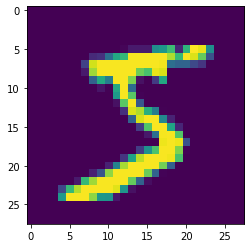

In [132]:
plt.imshow(x_train[0])
y_train[0] 

In [133]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [134]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation= "sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)
model.fit(x_train_flatten,y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1884 - accuracy: 0.6129
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9772 - accuracy: 0.6924
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7910 - accuracy: 0.7426
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6271 - accuracy: 0.7605
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4841 - accuracy: 0.7757
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3604 - accuracy: 0.7879
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2537 - accuracy: 0.7989
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1618 - accuracy: 0.8069
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0825 - accuracy: 0.8146
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.014

In [135]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9637 - accuracy: 0.8366


[0.963690996170044, 0.8366000056266785]

In [136]:
y_predicted=model.predict(x_test_flatten)
y_predicted_new= [np.argmax(i) for i in y_predicted ]
y_predicted_new[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 4, 7]

In [137]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

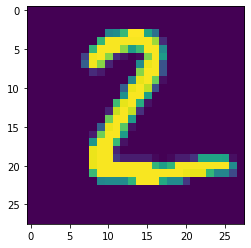

In [138]:
plt.imshow(x_test[1])

In [139]:
from sklearn.metrics import confusion_matrix,classification_report
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_new)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 922,    1,    4,    9,    0,    9,   25,    1,    8,    1],
       [   0, 1097,    8,    4,    0,    2,    5,    0,   19,    0],
       [  17,   54,  818,   27,   20,    0,   31,   23,   41,    1],
       [   4,   25,   29,  876,    1,    6,    8,   20,   29,   12],
       [   1,   19,    3,    0,  818,    0,   25,    4,    7,  105],
       [  21,   64,    7,  141,   28,  541,   25,   25,   19,   21],
       [  19,   33,   11,    0,   16,   15,  862,    0,    2,    0],
       [   1,   55,   16,    2,   11,    0,    2,  899,    9,   33],
       [  17,   63,   10,   75,   13,   14,   16,   17,  720,   29],
       [  17,   25,    6,   11,   63,    5,    1,   59,    9,  813]])>

Text(69.0, 0.5, 'true')

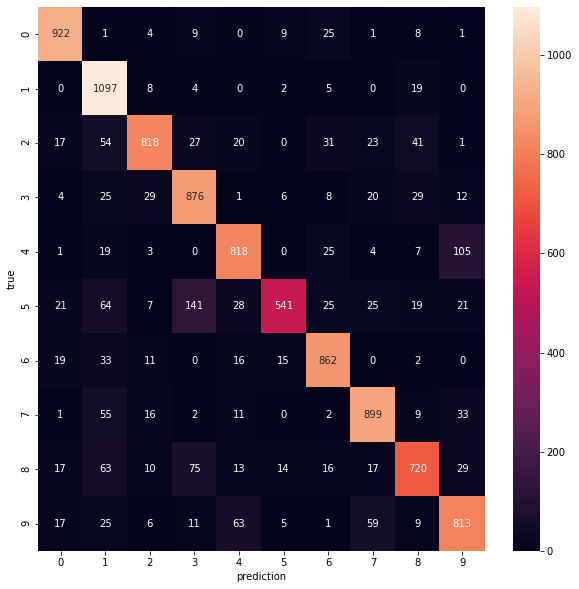

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(cm , annot=True,fmt="d")
plt.xlabel("prediction")
plt.ylabel("true") 

In [142]:
MODEL=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation= "relu"),
    keras.layers.Dense(50,activation= "relu"),
    keras.layers.Dense(10,activation= "sigmoid")
])

MODEL.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)
MODEL.fit(x_train_flatten,y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9023 - accuracy: 0.7186
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4246 - accuracy: 0.8731
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3667 - accuracy: 0.8925
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3304 - accuracy: 0.9034
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3016 - accuracy: 0.9118
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2757 - accuracy: 0.9190
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2535 - accuracy: 0.9252
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2327 - accuracy: 0.9320
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2150 - accuracy: 0.9362
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.199

In [143]:
MODEL.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1954 - accuracy: 0.9431


[0.1953766942024231, 0.9430999755859375]

In [144]:
y_pred=MODEL.predict(x_test_flatten)
y_pred_new= [np.argmax(i) for i in y_pred ]
y_pred_new[0] 

7

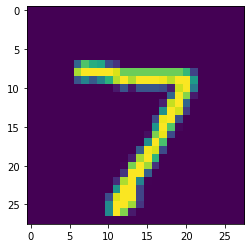

In [145]:
plt.imshow(x_test[0])

In [146]:
CM=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_new)
CM

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    1,    0,    2,    5,    2,    1,    1],
       [   0, 1106,    4,    4,    1,    1,    3,    3,   13,    0],
       [  14,    2,  966,   14,    6,    0,    7,    8,   13,    2],
       [   0,    0,   11,  966,    1,   12,    0,   11,    7,    2],
       [   2,    2,    3,    0,  936,    0,    9,    2,    3,   25],
       [   7,    1,    0,   40,    6,  798,   14,    1,   18,    7],
       [  10,    3,    4,    2,    6,    7,  924,    0,    2,    0],
       [   3,    7,   18,    9,    1,    0,    0,  976,    1,   13],
       [   8,    5,    8,   33,   11,   19,   11,   12,  864,    3],
       [  10,    7,    1,   11,   25,    5,    0,   16,    6,  928]])>

Text(69.0, 0.5, 'true')

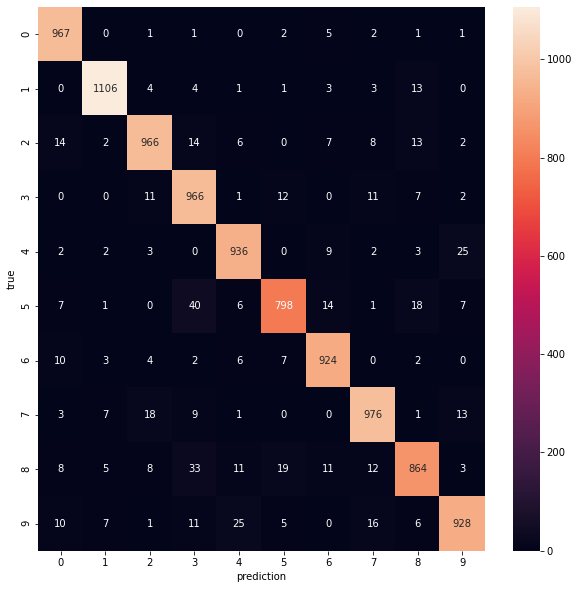

In [147]:
plt.figure(figsize=(10,10))
sns.heatmap(CM , annot=True,fmt="d")
plt.xlabel("prediction")
plt.ylabel("true")